In [1]:
#%pip install pydeseq2

In [2]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from scipy.stats import zscore
import pandas as pd
import os
import scanpy as sc
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
SRR25915982_count1 = pd.read_csv('SRR25915982_1.txt', sep='\t', skiprows=1)
SRR25915982_count2 = pd.read_csv('SRR25915982_2.txt', sep='\t', skiprows=1)
SRR25915982_counts = pd.concat([SRR25915982_count1 , SRR25915982_count1 ], axis=0)
SRR25915982_counts = SRR25915982_counts.iloc[:, [0, -1]].rename(columns={'HISAT2/SRR25915982_1trimmed.bam': 'SRR25915982'})


In [4]:
SRR25915984_count1 = pd.read_csv('SRR25915984_1.txt', sep='\t', skiprows=1)
SRR25915984_count2 = pd.read_csv('SRR25915984_2.txt', sep='\t', skiprows=1)
SRR25915984_counts = pd.concat([SRR25915984_count1 , SRR25915984_count1 ], axis=0)
SRR25915984_counts = SRR25915984_counts.iloc[:, [0, -1]].rename(columns={'HISAT2/SRR25915984_1trimmed.bam': 'SRR25915984'})

In [5]:
SRR25915983_count1 = pd.read_csv('SRR25915983_1.txt', sep='\t', skiprows=1)
SRR25915983_count2 = pd.read_csv('SRR25915983_2.txt', sep='\t', skiprows=1)
SRR25915983_counts = pd.concat([SRR25915983_count1 , SRR25915983_count1 ], axis=0)
SRR25915983_counts = SRR25915983_counts.iloc[:, [0, -1]].rename(columns={'HISAT2/SRR25915983_1trimmed.bam': 'SRR25915983'})

In [6]:
SRR25915985_count1 = pd.read_csv('SRR25915985_1.txt', sep='\t', skiprows=1)
SRR25915985_count2 = pd.read_csv('SRR25915985_2.txt', sep='\t', skiprows=1)
SRR25915985_counts = pd.concat([SRR25915985_count1 , SRR25915985_count1 ], axis=0)
SRR25915985_counts = SRR25915985_counts.iloc[:, [0, -1]].rename(columns={'HISAT2/SRR25915985_1trimmed.bam': 'SRR25915985'})

In [7]:
SRR25915982_counts.set_index('Geneid', inplace=True)
SRR25915983_counts.set_index('Geneid', inplace=True)
SRR25915984_counts.set_index('Geneid', inplace=True)
SRR25915985_counts.set_index('Geneid', inplace=True)

finalCount = pd.concat([SRR25915982_counts, SRR25915983_counts,SRR25915984_counts,SRR25915985_counts], axis=1)
finalCount

,SRR25915982,SRR25915983,SRR25915984,SRR25915985
Geneid,,,,
ENSG00000228037,0,0,0,1
ENSG00000142611,0,1,0,0
ENSG00000284616,0,0,0,0
ENSG00000157911,10,13,13,7
ENSG00000260972,0,0,0,0
...,...,...,...,...
ENSG00000271254,16,8,7,5
ENSG00000275987,0,0,0,0
ENSG00000268674,0,0,0,0


In [8]:
## SRR25915983 ----> GSM7757698: Hela, no sodium fluoroacetate treatment, rep1 ------> nSFT
## SRR25915982 ----> GSM7757699: Hela, no sodium fluoroacetate treatment, rep2 ------> nSFT
## SRR25915985 ----> GSM7757696: Hela, sodium fluoroacetate treatment, rep1 ------> SFT
## SRR25915984 ----> GSM7757697: Hela, sodium fluoroacetate treatment, rep2 ------> SFT
finalCount = finalCount.T
finalCount

Geneid,ENSG00000228037,ENSG00000142611,ENSG00000284616,ENSG00000157911,ENSG00000260972,ENSG00000224340,ENSG00000226374,ENSG00000229280,ENSG00000142655,ENSG00000232596,...,ENSG00000276351,ENSG00000276345,ENSG00000273532,ENSG00000275063,ENSG00000277856,ENSG00000271254,ENSG00000275987,ENSG00000268674,ENSG00000277475,ENSG00000275405
SRR25915982,0,0,0,10,0,0,0,0,27,0,...,0,0,0,0,0,16,0,0,0,2
SRR25915983,0,1,0,13,0,0,0,0,29,0,...,0,0,0,0,0,8,0,0,0,1
SRR25915984,0,0,0,13,0,0,0,0,14,0,...,0,0,0,0,0,7,0,0,1,0
SRR25915985,1,0,0,7,0,0,0,0,9,0,...,0,0,0,0,0,5,0,0,0,0


In [9]:
# # Step 1: Remove '-1' from column names
# finalCount.columns = finalCount.columns.str.replace('-1', '')

# # # Step 2: Drop duplicate columns after renaming
# finalCount = finalCount.loc[:, ~finalCount.columns.duplicated()]
# finalCount

In [10]:
# print(dds.obs_names.is_unique)
# print(dds.var_names.is_unique)
# dds = dds[~dds.obs_names.duplicated()]
# dds = dds[:, ~dds.var_names.duplicated()]
# dds.obs_names_make_unique()
# dds.var_names_make_unique()

In [11]:
Metadata = pd.DataFrame(zip(finalCount.index, ['Control','Control','SFT','SFT']),
                        columns = ['Sample', 'Condition'])
Metadata = Metadata.set_index('Sample')
Metadata

,Condition
Sample,
SRR25915982,Control
SRR25915983,Control
SRR25915984,SFT
SRR25915985,SFT


In [12]:
dds = DeseqDataSet(counts=finalCount,metadata=Metadata,design_factors="Condition")

/home/rsharma3/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [13]:
dds.var_names_make_unique()


In [14]:
dds

AnnData object with n_obs × n_vars = 4 × 126280
    obs: 'Condition'
    obsm: 'design_matrix'

In [15]:
#126280

In [16]:
dds.deseq2()

Fitting size factors...
... done in 0.03 seconds.

Fitting dispersions...
... done in 4.03 seconds.

Fitting dispersion trend curve...
... done in 1.24 seconds.

/home/rsharma3/.conda/envs/pycaret_env/lib/python3.11/site-packages/pydeseq2/dds.py:490: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...
... done in 4.92 seconds.

Fitting LFCs...
... done in 5.57 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 0 outlier genes.



In [17]:
dds

AnnData object with n_obs × n_vars = 4 × 126280
    obs: 'Condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', 'cooks'

In [18]:
stat_res = DeseqStats(dds,contrast = ('Condition','SFT','Control'))

In [19]:
stat_res.summary()

Running Wald tests...
... done in 7.40 seconds.



Log2 fold change & Wald test p-value: Condition SFT vs Control
                    baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Geneid                                                                       
ENSG00000228037     0.316098        1.860916  5.329187  0.349193  0.726944   
ENSG00000142611     0.293956       -1.466069  5.314734 -0.275850  0.782663   
ENSG00000284616     0.000000             NaN       NaN       NaN       NaN   
ENSG00000157911    10.813906       -0.052499  0.916468 -0.057284  0.954319   
ENSG00000260972     0.000000             NaN       NaN       NaN       NaN   
...                      ...             ...       ...       ...       ...   
ENSG00000271254-1   8.369220       -0.690584  1.017308 -0.678835  0.497243   
ENSG00000275987-1   0.000000             NaN       NaN       NaN       NaN   
ENSG00000268674-1   0.000000             NaN       NaN       NaN       NaN   
ENSG00000277475-1   0.232651        1.637016  5.358533  0.305497  0.759988   
E

In [20]:
res = stat_res.results_df
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
ENSG00000228037,0.316098,1.860916,5.329187,0.349193,0.726944,0.997392
ENSG00000142611,0.293956,-1.466069,5.314734,-0.275850,0.782663,0.997392
ENSG00000284616,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000157911,10.813906,-0.052499,0.916468,-0.057284,0.954319,0.997392
ENSG00000260972,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
ENSG00000271254-1,8.369220,-0.690584,1.017308,-0.678835,0.497243,0.997392
ENSG00000275987-1,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000268674-1,0.000000,NaN,NaN,NaN,NaN,NaN


In [21]:
print(dds.shape)  # (n_samples, n_features)
print(min(dds.shape))

(4, 126280)
4


In [22]:
res1 = res

In [23]:
# Rename index by removing '-1' suffix at the end of GeneID
res1.index = res1.index.str.replace('-1$', '', regex=True)
res1

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
ENSG00000228037,0.316098,1.860916,5.329187,0.349193,0.726944,0.997392
ENSG00000142611,0.293956,-1.466069,5.314734,-0.275850,0.782663,0.997392
ENSG00000284616,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000157911,10.813906,-0.052499,0.916468,-0.057284,0.954319,0.997392
ENSG00000260972,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
ENSG00000271254,8.369220,-0.690584,1.017308,-0.678835,0.497243,0.997392
ENSG00000275987,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000268674,0.000000,NaN,NaN,NaN,NaN,NaN


In [24]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
ENSG00000228037,0.316098,1.860916,5.329187,0.349193,0.726944,0.997392
ENSG00000142611,0.293956,-1.466069,5.314734,-0.275850,0.782663,0.997392
ENSG00000284616,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000157911,10.813906,-0.052499,0.916468,-0.057284,0.954319,0.997392
ENSG00000260972,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
ENSG00000271254,8.369220,-0.690584,1.017308,-0.678835,0.497243,0.997392
ENSG00000275987,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000268674,0.000000,NaN,NaN,NaN,NaN,NaN


In [25]:
#####  get that geneid ----> gene name

In [26]:
#%pip install sanbomics

In [27]:
from sanbomics.tools import id_map

In [28]:
mapper = id_map(species = 'human')
res['Symbol'] = res.index.map(mapper.mapper) 
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000228037,0.316098,1.860916,5.329187,0.349193,0.726944,0.997392,AL139246.3
ENSG00000142611,0.293956,-1.466069,5.314734,-0.275850,0.782663,0.997392,PRDM16
ENSG00000284616,0.000000,NaN,NaN,NaN,NaN,NaN,AL139823.1
ENSG00000157911,10.813906,-0.052499,0.916468,-0.057284,0.954319,0.997392,PEX10
ENSG00000260972,0.000000,NaN,NaN,NaN,NaN,NaN,Z98259.1
...,...,...,...,...,...,...,...
ENSG00000271254,8.369220,-0.690584,1.017308,-0.678835,0.497243,0.997392,AC240274.1
ENSG00000275987,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000268674,0.000000,NaN,NaN,NaN,NaN,NaN,AC213203.1


In [29]:
mapper = id_map(species = 'human')
res1['Symbol'] = res1.index.map(mapper.mapper) 
res1

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000228037,0.316098,1.860916,5.329187,0.349193,0.726944,0.997392,AL139246.3
ENSG00000142611,0.293956,-1.466069,5.314734,-0.275850,0.782663,0.997392,PRDM16
ENSG00000284616,0.000000,NaN,NaN,NaN,NaN,NaN,AL139823.1
ENSG00000157911,10.813906,-0.052499,0.916468,-0.057284,0.954319,0.997392,PEX10
ENSG00000260972,0.000000,NaN,NaN,NaN,NaN,NaN,Z98259.1
...,...,...,...,...,...,...,...
ENSG00000271254,8.369220,-0.690584,1.017308,-0.678835,0.497243,0.997392,AC240274.1
ENSG00000275987,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000268674,0.000000,NaN,NaN,NaN,NaN,NaN,AC213203.1


In [30]:
res = res[res.baseMean >= 10]
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000157911,10.813906,-0.052499,0.916468,-0.057284,0.954319,0.997392,PEX10
ENSG00000142655,19.366103,-1.097472,0.703595,-1.559807,0.118806,0.997392,PEX14
ENSG00000171621,14.140665,-0.262897,0.796513,-0.330060,0.741355,0.997392,SPSB1
ENSG00000037637,26.012900,0.019445,0.582455,0.033385,0.973367,0.997392,FBXO42
ENSG00000159423,17.844329,-0.613138,0.701761,-0.873713,0.382274,0.997392,ALDH4A1
...,...,...,...,...,...,...,...
ENSG00000210196,92.173561,-0.326492,0.311559,-1.047931,0.294671,0.997392,MT-TP
ENSG00000276700,95.414018,2.640279,1.277555,2.066665,0.038766,0.997392,RNA5-8SN4
ENSG00000275757,170.698553,-1.052243,0.268948,-3.912435,0.000091,0.017058,NaN


In [31]:
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000142627,205.911199,1.177548,0.216257,5.445144,5.176335e-08,2.243898e-05,EPHA2
ENSG00000137936,156.562695,1.722577,0.251368,6.852820,7.240822e-12,6.613974e-09,BCAR3
ENSG00000137962,135.480807,1.320174,0.267170,4.941333,7.759013e-07,2.645927e-04,ARHGAP29
ENSG00000117318,94.133469,-1.799955,0.326958,-5.505157,3.688392e-08,1.684541e-05,ID3
ENSG00000142871,547.409603,2.050497,0.146726,13.975037,2.213987e-44,2.831247e-40,CCN1
...,...,...,...,...,...,...,...
ENSG00000100345,1714.147962,0.661397,0.084928,7.787773,6.820049e-15,9.180504e-12,MYH9
ENSG00000128272,357.371516,0.941288,0.162009,5.810103,6.243429e-09,3.397488e-06,ATF4
ENSG00000100234,107.902398,1.223897,0.299556,4.085708,4.394253e-05,8.849403e-03,TIMP3


In [32]:
#GSEA#
#%pip install gseapy


In [33]:
import gseapy as gp
from gseapy.plot import gseaplot

In [34]:
ranking = res[['Symbol', 'stat']].dropna().sort_values('stat', ascending = False)
ranking

,Symbol,stat
Geneid,,
ENSG00000013588,GPRC5A,20.250549
ENSG00000013588,GPRC5A,20.250549
ENSG00000142871,CCN1,13.975037
ENSG00000142871,CCN1,13.975037
ENSG00000135046,ANXA1,11.274120
...,...,...
ENSG00000278828,H3C10,-7.153201
ENSG00000072274,TFRC,-7.806981
ENSG00000072274,TFRC,-7.806981


In [35]:
ranking = ranking.drop_duplicates('Symbol')
ranking

,Symbol,stat
Geneid,,
ENSG00000013588,GPRC5A,20.250549
ENSG00000142871,CCN1,13.975037
ENSG00000135046,ANXA1,11.274120
ENSG00000175592,FOSL1,11.260671
ENSG00000092820,EZR,10.668444
...,...,...
ENSG00000286522,H3C2,-6.824744
ENSG00000184357,H1-5,-7.139266
ENSG00000278828,H3C10,-7.153201


In [36]:
print(ranking.shape)  # This will show how many columns are present

#ranking1 = ranking.reset_index()
ranking1 =ranking.set_index('Symbol')
ranking1

(9454, 2)


,stat
Symbol,
GPRC5A,20.250549
CCN1,13.975037
ANXA1,11.274120
FOSL1,11.260671
EZR,10.668444
...,...
H3C2,-6.824744
H1-5,-7.139266
H3C10,-7.153201


In [37]:
manual_set = {'things':['GPRC5A', 'CCN1', 'ANXA1', 'FOSL1', 'EZR']}

In [38]:
#gp.get_library_name()

In [39]:
go_mf = gp.get_library(name='GO_Biological_Process_2021', organism='Human')

In [40]:
pre_res = gp.prerank(rnk = ranking1,
                     gene_sets = ['GO_Biological_Process_2021', manual_set],
                     threads=4,
                     min_size=5,
                     max_size=1000,
                     permutation_num=100, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    )

2024-09-20 18:07:03,820 [WARNING] Duplicated values found in preranked stats: 0.08% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-09-20 18:07:03,820 [INFO] Parsing data files for GSEA.............................
2024-09-20 18:07:03,821 [INFO] Enrichr library gene sets already downloaded in: /home/rsharma3/.cache/gseapy, use local file
2024-09-20 18:07:03,908 [INFO] 1824 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-09-20 18:07:03,909 [INFO] 4213 gene_sets used for further statistical testing.....
2024-09-20 18:07:03,909 [INFO] Start to run GSEA...Might take a while..................
2024-09-20 18:07:14,788 [INFO] Congratulations. GSEApy runs successfully................



In [41]:
out = []

for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes']])

out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df


,Term,fdr,es,nes
0,GO_Biological_Process_2021__nucleosome organiz...,0.0,-0.634932,-2.608999
1,GO_Biological_Process_2021__chromatin assembly...,0.0,-0.748429,-2.859509
2,GO_Biological_Process_2021__anaphase-promoting...,0.0,-0.631802,-2.564322
3,GO_Biological_Process_2021__regulation of woun...,0.0,0.807102,2.300343
4,GO_Biological_Process_2021__regulation of cell...,0.0,-0.659953,-2.478319
...,...,...,...,...
4208,GO_Biological_Process_2021__mitochondrial DNA ...,1.0,-0.235398,-0.493895
4209,GO_Biological_Process_2021__ATP transport (GO:...,1.0,-0.265319,-0.508273
4210,GO_Biological_Process_2021__purine nucleotide ...,1.0,-0.212974,-0.510212
4211,GO_Biological_Process_2021__regulation of hist...,1.0,-0.225597,-0.514515


In [42]:
out_df.sort_values('nes').iloc[0].Term

'GO_Biological_Process_2021__chromatin assembly (GO:0031497)'

In [43]:
#print(pre_res.results['GO_Biological_Process_2021__chromatin assembly (GO:0031497)'])



TypeError: gseaplot() got multiple values for argument 'term'

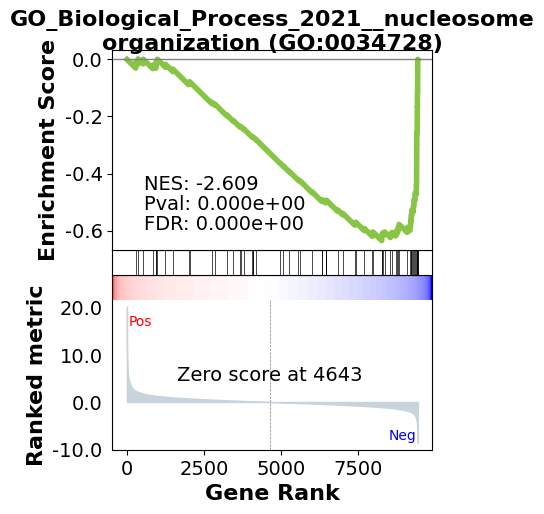

In [44]:
#term = terms[0]
#result = pre_res.results[term]
terms =pre_res.res2d.Term
axs = pre_res.plot(terms=terms[1]) # v1.0.

gseaplot(pre_res.ranking,term=terms[0],**pre_res.results[terms[0]], ofname="gseaplot1.png")

In [45]:
axs = pre_res.plot(terms=terms[1:5],
                   #legend_kws={'loc': (1.2, 0)}, # set the legend loc
                   show_ranking=True, # whether to show the second yaxis
                   figsize=(3,4),
                   ofname="gseaplot2.png")

# or use this to have more control on the plot
# from gseapy import gseaplot2
# terms = pre_res.res2d.Term[1:5]
# hits = [pre_res.results[t]['hits'] for t in terms]
# runes = [pre_res.results[t]['RES'] for t in terms]
# fig = gseaplot2(terms=terms, ress=runes, hits=hits,
#               rank_metric=gs_res.ranking,
#               legend_kws={'loc': (1.2, 0)}, # set the legend loc
#               figsize=(4,5)) # rank_metric=pre_res.ranking

In [46]:
import numpy as np
import seaborn as sns


In [47]:
dds

AnnData object with n_obs × n_vars = 4 × 126280
    obs: 'Condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', 'cooks'

In [48]:
gene_mapping = pd.DataFrame(res1['Symbol']).reset_index()
gene_mapping

,Geneid,Symbol
0,ENSG00000228037,AL139246.3
1,ENSG00000142611,PRDM16
2,ENSG00000284616,AL139823.1
3,ENSG00000157911,PEX10
4,ENSG00000260972,Z98259.1
...,...,...
126275,ENSG00000271254,AC240274.1
126276,ENSG00000275987,NaN
126277,ENSG00000268674,AC213203.1
126278,ENSG00000277475,AC213203.2


In [49]:
dds.layers['normed_counts']

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.40426247],
       [0.        , 1.17582292, 0.        , ..., 0.        , 0.        ,
        1.17582292],
       [0.        , 0.        , 0.        , ..., 0.        , 0.93060486,
        0.        ],
       [1.26439282, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [50]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

In [51]:
dds.layers['log1p']

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.87724319],
       [0.        , 0.77740695, 0.        , ..., 0.        , 0.        ,
        0.77740695],
       [0.        , 0.        , 0.        , ..., 0.        , 0.65783335,
        0.        ],
       [0.81730665, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [52]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000142627,205.911199,1.177548,0.216257,5.445144,5.176335e-08,2.243898e-05,EPHA2
ENSG00000137936,156.562695,1.722577,0.251368,6.852820,7.240822e-12,6.613974e-09,BCAR3
ENSG00000137962,135.480807,1.320174,0.267170,4.941333,7.759013e-07,2.645927e-04,ARHGAP29
ENSG00000117318,94.133469,-1.799955,0.326958,-5.505157,3.688392e-08,1.684541e-05,ID3
ENSG00000142871,547.409603,2.050497,0.146726,13.975037,2.213987e-44,2.831247e-40,CCN1
...,...,...,...,...,...,...,...
ENSG00000100345,1714.147962,0.661397,0.084928,7.787773,6.820049e-15,9.180504e-12,MYH9
ENSG00000128272,357.371516,0.941288,0.162009,5.810103,6.243429e-09,3.397488e-06,ATF4
ENSG00000100234,107.902398,1.223897,0.299556,4.085708,4.394253e-05,8.849403e-03,TIMP3


In [53]:
print(sigs['Symbol'].head(50).to_string(index=False))

Geneid
   EPHA2
   BCAR3
ARHGAP29
     ID3
    CCN1
     DR1
   DDAH1
    ASPM
  H2AC20
 S100A10
   EFHD2
    ROR1
     SFN
  H2BC18
  H2BC21
   CSRP1
   CAPN2
 GADD45A
    ABL2
    LMNA
  NUCKS1
 ITPRID2
    NAB1
  PRSS56
    IDH1
   NABP1
   CAB39
    BZW1
    RTN4
  TM4SF1
   NCEH1
   GSK3B
  AMOTL2
   ITPR1
    MGLL
 ATP13A3
    TFRC
   PLOD2
    MITF
   SGMS2
 RAPGEF2
  SORBS2
   ITGA2
    LIFR
   DUSP1
   ERBIN
    TRIO
  SQSTM1
    BMP6
   FOXF2


In [54]:
print(sigs['Symbol'].head(100).to_string(index=False))

Geneid
    EPHA2
    BCAR3
 ARHGAP29
      ID3
     CCN1
      DR1
    DDAH1
     ASPM
   H2AC20
  S100A10
    EFHD2
     ROR1
      SFN
   H2BC18
   H2BC21
    CSRP1
    CAPN2
  GADD45A
     ABL2
     LMNA
   NUCKS1
  ITPRID2
     NAB1
   PRSS56
     IDH1
    NABP1
    CAB39
     BZW1
     RTN4
   TM4SF1
    NCEH1
    GSK3B
   AMOTL2
    ITPR1
     MGLL
  ATP13A3
     TFRC
    PLOD2
     MITF
    SGMS2
  RAPGEF2
   SORBS2
    ITGA2
     LIFR
    DUSP1
    ERBIN
     TRIO
   SQSTM1
     BMP6
    FOXF2
    FOXC1
   KCTD20
    SRSF3
    PXDC1
     H3C2
     H1-2
     H1-4
   H2AC16
     H1-5
    H2AC6
     H3C7
   H2BC10
    H3C10
      EZR
   H2AC13
    H2BC8
   H2BC13
   H2BC15
    H2BC7
    H2BC9
     H3C8
     H4C2
     H4C5
   H2BC11
   H2AC11
   H2AC12
    H2AC8
   H2BC12
  TNFAIP3
     AMD1
     CDK6
     EGFR
     OGDH
     SAT1
    MBNL3
    DOCK5
     EXT1
TNFRSF10D
     PLEC
     AGO2
   CASC19
     ASPH
  ST3GAL1
    ANXA1
    HSPA5
     UGCG
   SPTAN1
   TGFBR1
    AHNAK
 AR

In [55]:
dds_sigs = dds[:, sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 4 × 330
    obs: 'Condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'log1p'

In [56]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=sigs['Symbol'], columns=dds_sigs.obs_names)  #dds_sigs.var_names


In [57]:
dds_sigs.var_names

Index(['ENSG00000142627', 'ENSG00000137936', 'ENSG00000137962',
       'ENSG00000117318', 'ENSG00000142871', 'ENSG00000117505',
       'ENSG00000153904', 'ENSG00000066279', 'ENSG00000184260',
       'ENSG00000197747',
       ...
       'ENSG00000130726', 'ENSG00000124466', 'ENSG00000087074',
       'ENSG00000167460', 'ENSG00000138944', 'ENSG00000100345',
       'ENSG00000128272', 'ENSG00000100234', 'ENSG00000188064',
       'ENSG00000275757'],
      dtype='object', name='Geneid', length=330)

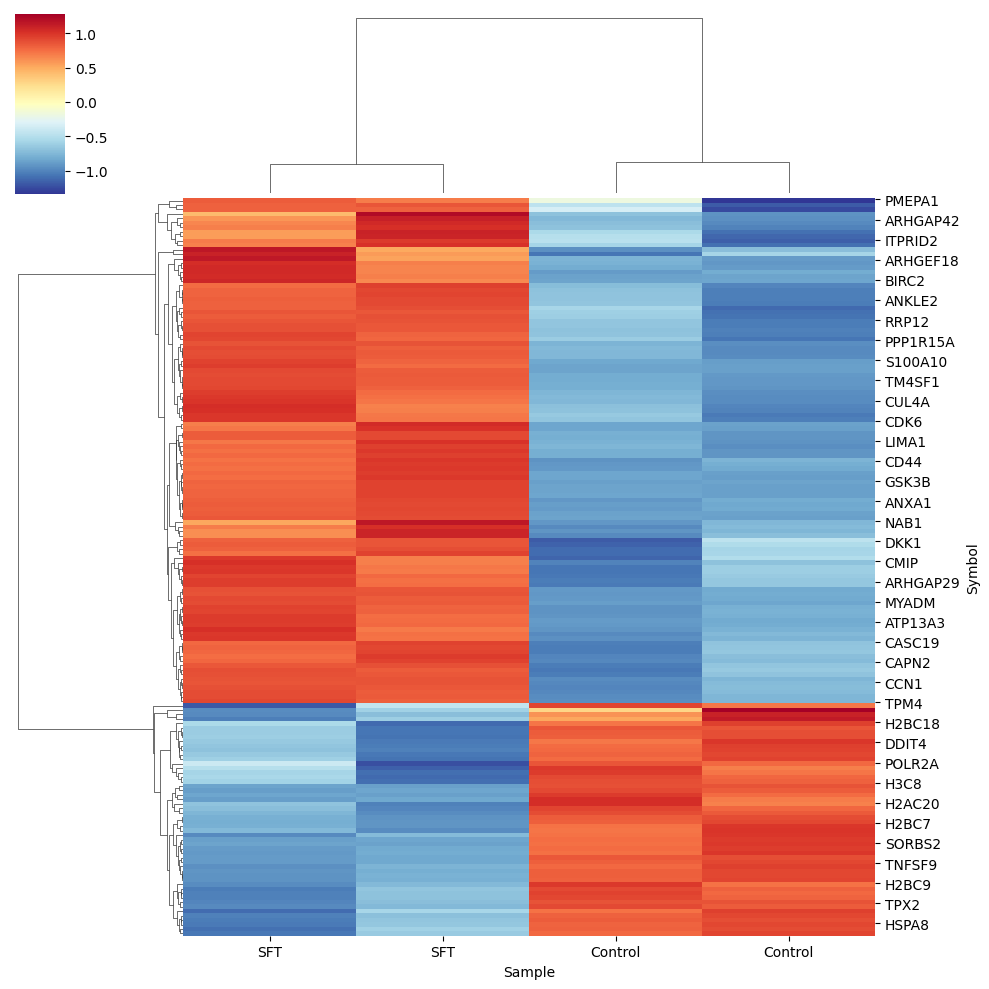

In [58]:
custom_labels = ['Control','Control','SFT','SFT']
g = sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r', xticklabels=custom_labels)
g.savefig("heatmap.png") 
plt.show()

In [59]:
SetOfGenes =['EPHA2','BCAR3','ARHGAP29','ID3','CCN1','DR1','DDAH1','ASPM','H2AC20','S100A10']
 

In [60]:
sigs[sigs.Symbol.isin(SetOfGenes)].index

Index(['ENSG00000142627', 'ENSG00000137936', 'ENSG00000137962',
       'ENSG00000117318', 'ENSG00000142871', 'ENSG00000117505',
       'ENSG00000153904', 'ENSG00000066279', 'ENSG00000184260',
       'ENSG00000197747', 'ENSG00000142627', 'ENSG00000137936',
       'ENSG00000137962', 'ENSG00000117318', 'ENSG00000142871',
       'ENSG00000117505', 'ENSG00000153904', 'ENSG00000066279',
       'ENSG00000184260', 'ENSG00000197747'],
      dtype='object', name='Geneid')

In [61]:
# Check which gene names in the column match the list
#sigs.loc[:,'Match'] = sigs['Symbol'].isin(SetOfGenes)
#sigs

In [62]:
dds_sub = dds[:, sigs[sigs.Symbol.isin(SetOfGenes)].index]

In [63]:
grapher = pd.DataFrame(dds_sub.layers['log1p'].T,
                       index=dds_sub.var_names, columns=dds_sub.obs_names)
grapher.index = grapher.index.map(mapper.mapper)

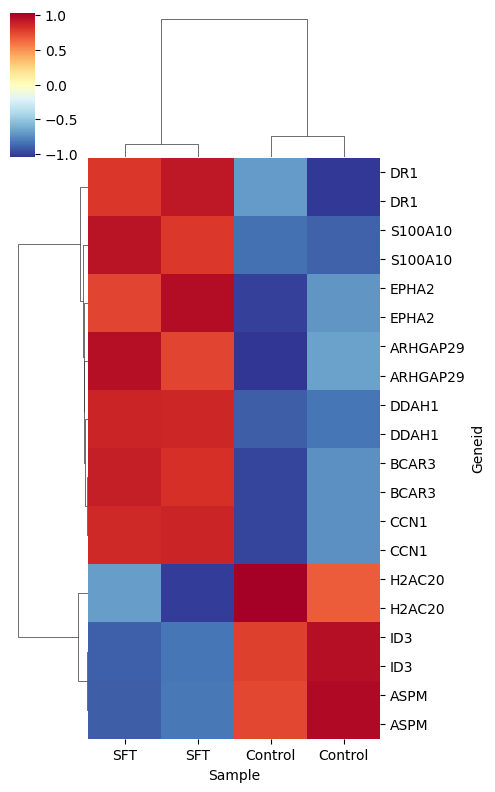

In [64]:
custom_labels = ['Control','Control','SFT','SFT']
ax = sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r', figsize=(5,8),xticklabels=custom_labels)
ax.savefig("heatmap_top10.png") 
plt.show()

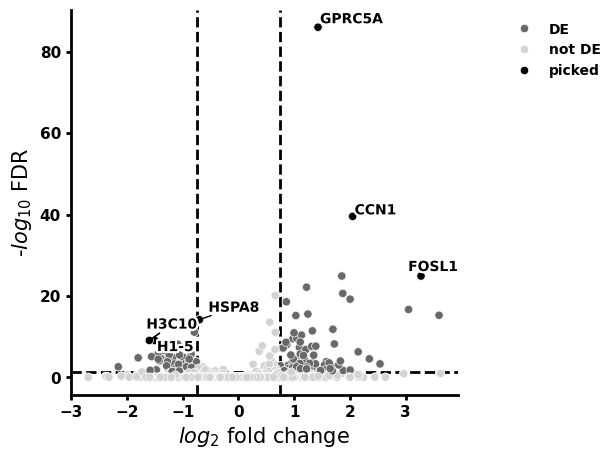

In [65]:
from sanbomics.plots import volcano
volcano(res,pvalue ='padj', log2fc = 'log2FoldChange', symbol='Symbol')

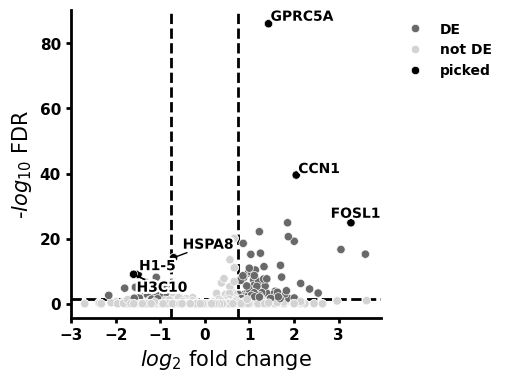

In [66]:

g1 = volcano(res, log2fc = 'log2FoldChange',pvalue ='padj', symbol='Symbol',  fontsize = 10,
           colors = ['dimgrey', 'lightgrey', 'black'],save = True, figsize=(4,4))


In [67]:
#####PCA ANALYSIS WITH SCANPY

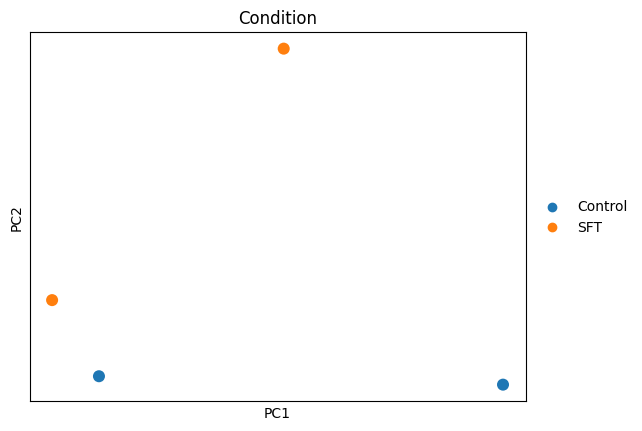

In [68]:

sc.tl.pca(dds)
sc.pl.pca(dds, color = 'Condition', size = 300,save=True)

In [69]:
dds

AnnData object with n_obs × n_vars = 4 × 126280
    obs: 'Condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable', 'X_pca'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', 'PCs'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'log1p'

In [70]:
gene_mapping = res1['Symbol'].reset_index()
gene_mapping

,Geneid,Symbol
0,ENSG00000228037,AL139246.3
1,ENSG00000142611,PRDM16
2,ENSG00000284616,AL139823.1
3,ENSG00000157911,PEX10
4,ENSG00000260972,Z98259.1
...,...,...
126275,ENSG00000271254,AC240274.1
126276,ENSG00000275987,NaN
126277,ENSG00000268674,AC213203.1
126278,ENSG00000277475,AC213203.2


In [71]:
#dds.var['gene_name'] = dds.var.index.map(gene_mapping.set_index('Geneid')['Symbol'])
finalCount_new =  finalCount

In [72]:
# # Step 1: Remove '-1' from column names
finalCount_new.columns = finalCount_new.columns.str.replace('-1', '')

# # # Step 2: Drop duplicate columns after renaming
finalCount_new = finalCount_new.loc[:, ~finalCount_new.columns.duplicated()]
finalCount_new

Geneid,ENSG00000228037,ENSG00000142611,ENSG00000284616,ENSG00000157911,ENSG00000260972,ENSG00000224340,ENSG00000226374,ENSG00000229280,ENSG00000142655,ENSG00000232596,...,ENSG00000276351,ENSG00000276345,ENSG00000273532,ENSG00000275063,ENSG00000277856,ENSG00000271254,ENSG00000275987,ENSG00000268674,ENSG00000277475,ENSG00000275405
SRR25915982,0,0,0,10,0,0,0,0,27,0,...,0,0,0,0,0,16,0,0,0,2
SRR25915983,0,1,0,13,0,0,0,0,29,0,...,0,0,0,0,0,8,0,0,0,1
SRR25915984,0,0,0,13,0,0,0,0,14,0,...,0,0,0,0,0,7,0,0,1,0
SRR25915985,1,0,0,7,0,0,0,0,9,0,...,0,0,0,0,0,5,0,0,0,0


In [73]:
dds_new = DeseqDataSet(counts=finalCount_new,metadata=Metadata,design_factors="Condition")
dds_new

AnnData object with n_obs × n_vars = 4 × 63140
    obs: 'Condition'
    obsm: 'design_matrix'

In [74]:
dds_new.deseq2()

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 2.91 seconds.

Fitting dispersion trend curve...
... done in 0.67 seconds.

/home/rsharma3/.conda/envs/pycaret_env/lib/python3.11/site-packages/pydeseq2/dds.py:490: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...
... done in 2.55 seconds.

Fitting LFCs...
... done in 4.00 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.



In [75]:
stat_res = DeseqStats(dds_new,contrast = ('Condition','SFT','Control'))

In [76]:
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Condition SFT vs Control
                  baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Geneid                                                                     
ENSG00000228037   0.316098        1.860916  5.329187  0.349193  0.726944   
ENSG00000142611   0.293956       -1.466069  5.314734 -0.275850  0.782663   
ENSG00000284616   0.000000             NaN       NaN       NaN       NaN   
ENSG00000157911  10.813906       -0.052499  0.916468 -0.057284  0.954319   
ENSG00000260972   0.000000             NaN       NaN       NaN       NaN   
...                    ...             ...       ...       ...       ...   
ENSG00000271254   8.369220       -0.690584  1.017308 -0.678835  0.497243   
ENSG00000275987   0.000000             NaN       NaN       NaN       NaN   
ENSG00000268674   0.000000             NaN       NaN       NaN       NaN   
ENSG00000277475   0.232651        1.637016  5.358533  0.305497  0.759988   
ENSG00000275405   0.64502

... done in 4.46 seconds.



In [85]:
res_new = stat_res.results_df
res_new

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000228037,0.316098,1.860916,5.329187,0.349193,0.726944,0.997392,AL139246.3
ENSG00000142611,0.293956,-1.466069,5.314734,-0.275850,0.782663,0.997392,PRDM16
ENSG00000284616,0.000000,NaN,NaN,NaN,NaN,NaN,AL139823.1
ENSG00000157911,10.813906,-0.052499,0.916468,-0.057284,0.954319,0.997392,PEX10
ENSG00000260972,0.000000,NaN,NaN,NaN,NaN,NaN,Z98259.1
...,...,...,...,...,...,...,...
ENSG00000271254,8.369220,-0.690584,1.017308,-0.678835,0.497243,0.997392,AC240274.1
ENSG00000275987,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000268674,0.000000,NaN,NaN,NaN,NaN,NaN,AC213203.1


In [86]:
mapper = id_map(species = 'human')
res_new['Symbol'] = res_new.index.map(mapper.mapper) 
res_new

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000228037,0.316098,1.860916,5.329187,0.349193,0.726944,0.997392,AL139246.3
ENSG00000142611,0.293956,-1.466069,5.314734,-0.275850,0.782663,0.997392,PRDM16
ENSG00000284616,0.000000,NaN,NaN,NaN,NaN,NaN,AL139823.1
ENSG00000157911,10.813906,-0.052499,0.916468,-0.057284,0.954319,0.997392,PEX10
ENSG00000260972,0.000000,NaN,NaN,NaN,NaN,NaN,Z98259.1
...,...,...,...,...,...,...,...
ENSG00000271254,8.369220,-0.690584,1.017308,-0.678835,0.497243,0.997392,AC240274.1
ENSG00000275987,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000268674,0.000000,NaN,NaN,NaN,NaN,NaN,AC213203.1


In [87]:
gene_mapping1 = pd.DataFrame(res_new['Symbol']).reset_index()
gene_mapping1

,Geneid,Symbol
0,ENSG00000228037,AL139246.3
1,ENSG00000142611,PRDM16
2,ENSG00000284616,AL139823.1
3,ENSG00000157911,PEX10
4,ENSG00000260972,Z98259.1
...,...,...
63135,ENSG00000271254,AC240274.1
63136,ENSG00000275987,NaN
63137,ENSG00000268674,AC213203.1
63138,ENSG00000277475,AC213203.2


In [88]:
dds_new.var['gene_name'] = dds_new.var.index.map(gene_mapping1.set_index('Geneid')['Symbol'])
dds_new.var

,gene_name
Geneid,
ENSG00000228037,AL139246.3
ENSG00000142611,PRDM16
ENSG00000284616,AL139823.1
ENSG00000157911,PEX10
ENSG00000260972,Z98259.1
...,...
ENSG00000271254,AC240274.1
ENSG00000275987,NaN
ENSG00000268674,AC213203.1


In [89]:
res_new = res_new[res_new.baseMean >= 10]
res_new

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000157911,10.813906,-0.052499,0.916468,-0.057284,0.954319,0.997392,PEX10
ENSG00000142655,19.366103,-1.097472,0.703595,-1.559807,0.118806,0.997392,PEX14
ENSG00000171621,14.140665,-0.262897,0.796513,-0.330060,0.741355,0.997392,SPSB1
ENSG00000037637,26.012900,0.019445,0.582455,0.033385,0.973367,0.997392,FBXO42
ENSG00000159423,17.844329,-0.613138,0.701761,-0.873713,0.382274,0.997392,ALDH4A1
...,...,...,...,...,...,...,...
ENSG00000210196,92.173561,-0.326492,0.311559,-1.047931,0.294671,0.997392,MT-TP
ENSG00000276700,95.414018,2.640279,1.277555,2.066665,0.038766,0.997392,RNA5-8SN4
ENSG00000275757,170.698553,-1.052243,0.268948,-3.912435,0.000091,0.017058,NaN


In [90]:
sigs_new = res_new[(res_new.padj < 0.05) & (abs(res_new.log2FoldChange) > 0.5)]
sigs_new

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000142627,205.911199,1.177548,0.216257,5.445144,5.176335e-08,2.243898e-05,EPHA2
ENSG00000137936,156.562695,1.722577,0.251368,6.852820,7.240822e-12,6.613974e-09,BCAR3
ENSG00000137962,135.480807,1.320174,0.267170,4.941333,7.759013e-07,2.645927e-04,ARHGAP29
ENSG00000117318,94.133469,-1.799955,0.326958,-5.505157,3.688392e-08,1.684541e-05,ID3
ENSG00000142871,547.409603,2.050497,0.146726,13.975037,2.213987e-44,2.831247e-40,CCN1
...,...,...,...,...,...,...,...
ENSG00000100345,1714.147962,0.661397,0.084928,7.787773,6.820049e-15,9.180504e-12,MYH9
ENSG00000128272,357.371516,0.941288,0.162009,5.810103,6.243429e-09,3.397488e-06,ATF4
ENSG00000100234,107.902398,1.223897,0.299556,4.085708,4.394253e-05,8.849403e-03,TIMP3


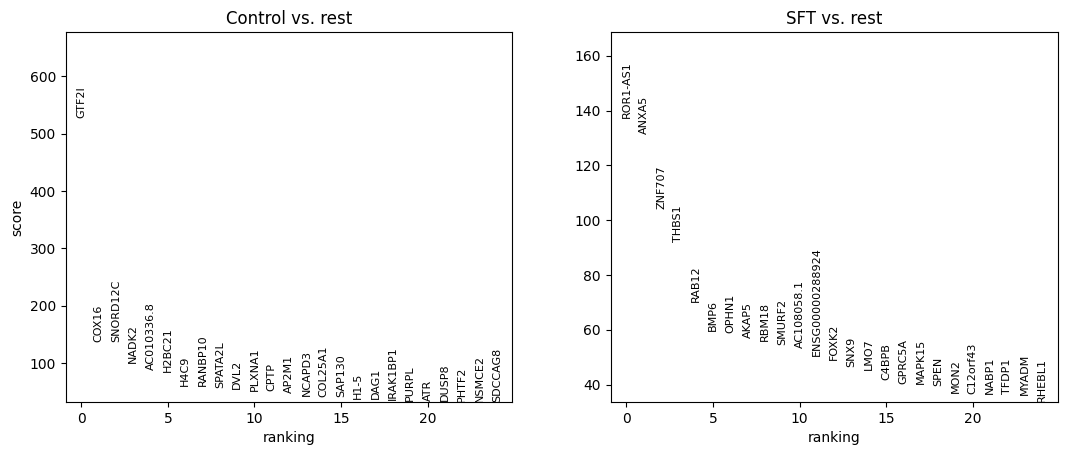

In [94]:
# Normalize the data
sc.pp.normalize_total(dds_new, target_sum=1e4)
sc.pp.log1p(dds_new)

# # Perform differential expression (between two conditions)
ax = sc.tl.rank_genes_groups(dds_new, groupby='Condition', method='t-test')

# # Step 1: Ensure gene names are mapped correctly in adata.var
dds_new.var['gene_name'] = dds_new.var.index.map(gene_mapping1.set_index('Geneid')['Symbol'])

# # Step 2: Replace gene IDs with gene names in dds.uns['rank_genes_groups']['names']
ranked_genes = dds_new.uns['rank_genes_groups']['names'].copy()

# # Step 3: Iterate over each group and replace gene IDs with gene names
for group in ranked_genes.dtype.names:  # dtype.names gives the group names
    ranked_genes[group] = [dds_new.var['gene_name'][gene] if pd.notna(dds_new.var['gene_name'][gene]) else gene for gene in ranked_genes[group]]

# # Step 4: Update the names in dds.uns
dds_new.uns['rank_genes_groups']['names'] = ranked_genes
# # Get the result of the differential expression analysis
ax = sc.pl.rank_genes_groups(dds_new, n_genes=25,  sharey=False, save = "rankedGene.png" )

# Export results to a DataFrame for further analysis
de_results = pd.DataFrame(dds_new.uns['rank_genes_groups']['names'])
de_results.to_csv('differential_expression_results.csv')



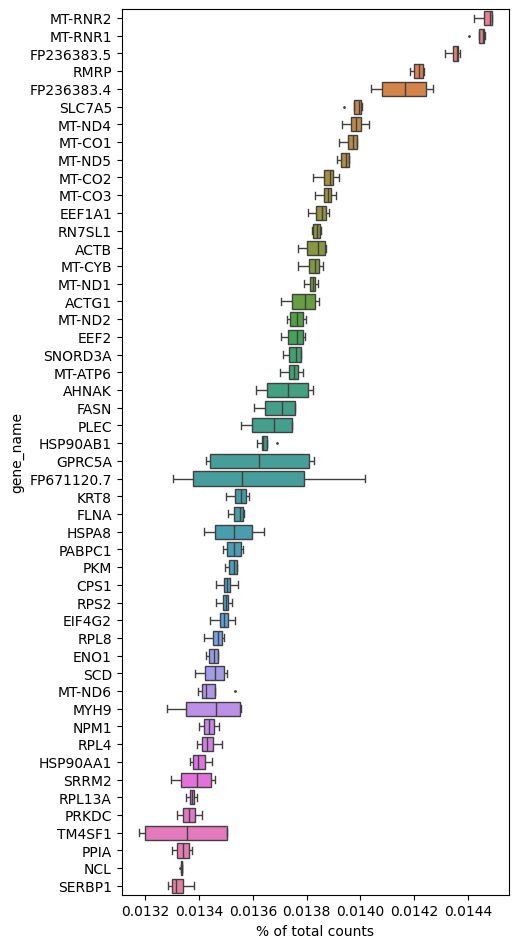

In [95]:
# Normalize the data
# sc.pp.normalize_total(dds, target_sum=1e4)
# sc.pp.log1p(dds)


sc.pl.highest_expr_genes(dds_new, n_top=50, save="Top50GeneExp.png", gene_symbols = 'gene_name') #,


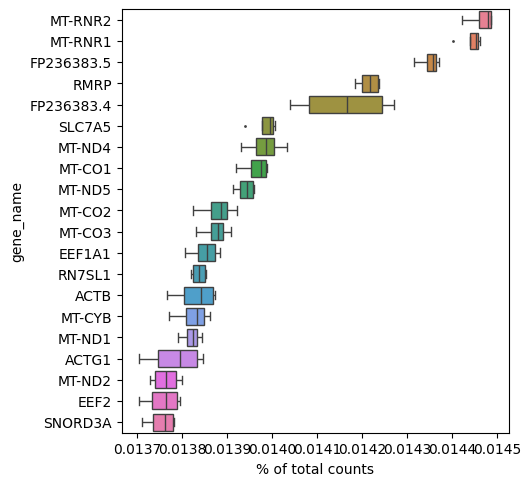

In [96]:
sc.pl.highest_expr_genes(dds_new, n_top=20, save="Top20GeneExp.png", gene_symbols = 'gene_name')

In [97]:
dds_new.layers['normed_counts']

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.40426247],
       [0.        , 1.17582292, 0.        , ..., 0.        , 0.        ,
        1.17582292],
       [0.        , 0.        , 0.        , ..., 0.        , 0.93060486,
        0.        ],
       [1.26439282, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [98]:
dds_new.layers['log1p'] = np.log1p(dds_new.layers['normed_counts'])

In [99]:
dds_new_sigs = dds_new[:, sigs_new.index]
dds_new_sigs

View of AnnData object with n_obs × n_vars = 4 × 165
    obs: 'Condition'
    var: 'gene_name'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'log1p', 'rank_genes_groups'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'log1p'

In [100]:
grapher_new = pd.DataFrame(dds_new_sigs.layers['log1p'].T,
                       index=sigs_new['Symbol'], columns=dds_new_sigs.obs_names)  #dds_sigs.var_names

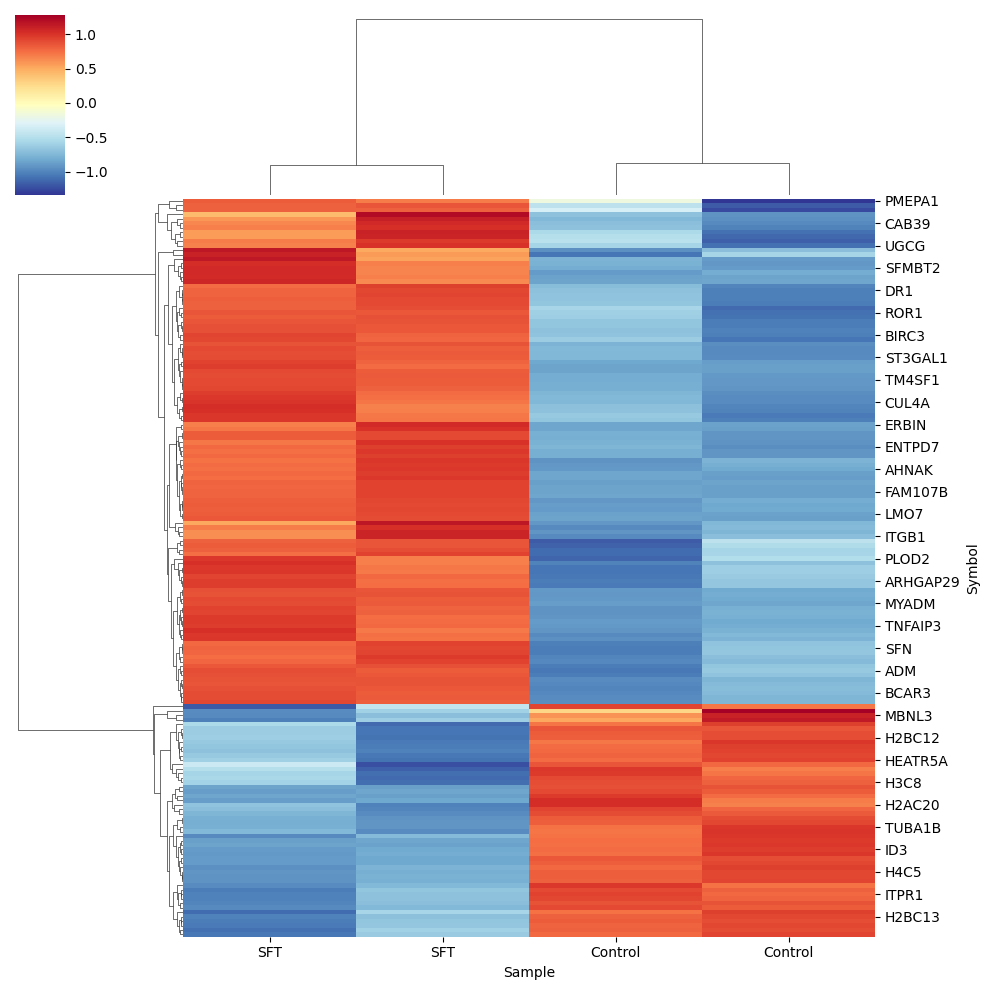

In [101]:
custom_labels = ['Control','Control','SFT','SFT']
g = sns.clustermap(grapher_new, z_score=0, cmap = 'RdYlBu_r', xticklabels=custom_labels)
g.savefig("heatmap_nodup.png") 
plt.show()

In [102]:
#%pip install ipycytoscape
#%pip install py2cytoscape

In [105]:
genes100 = sigs_new['Symbol'].head(100)
genes100.to_csv('GenesTop100.csv', index=False) 

In [106]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(gene_list="GenesTop100.csv",
                 gene_sets=['Reactome_2022','KEGG_2021_Human','WikiPathway_2023_Human'],
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
     

In [107]:
enr.results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2022,HDACs Deacetylate Histones R-HSA-3214815,12/60,1.604936e-16,7.398757e-14,0,0,55.761236,2027.940094,H2AC11;H2BC12;H2BC9;H2AC12;H2BC13;H2BC15;H2AC6...
1,Reactome_2022,HCMV Early Events R-HSA-9609690,13/96,1.787491e-15,4.120168e-13,0,0,35.269441,1197.678395,H2BC9;H2AC6;H2BC18;EGFR;H2AC11;H2BC12;H2AC12;H...
2,Reactome_2022,HATs Acetylate Histones R-HSA-3214847,13/106,6.764069e-15,1.039412e-12,0,0,31.461144,1026.487510,H2BC9;DR1;H2AC6;H2BC18;H2AC11;H2BC12;H2AC12;H2...
3,Reactome_2022,DNA Damage/Telomere Stress Induced Senescence ...,11/61,1.055521e-14,1.216488e-12,0,0,48.519778,1561.471096,H2BC12;H2BC9;H1-5;H2BC13;H1-4;H2BC15;H2AC6;H2B...
4,Reactome_2022,HCMV Late Events R-HSA-9610379,12/91,3.184785e-14,2.582954e-12,0,0,33.827336,1051.279402,H2AC11;H2BC12;H2BC9;H2AC12;H2BC13;H2BC15;H2AC6...
...,...,...,...,...,...,...,...,...,...,...
888,WikiPathway_2023_Human,Insulin Signaling WP481,1/160,5.566035e-01,5.651997e-01,0,0,1.241509,0.727403,GSK3B
889,WikiPathway_2023_Human,Chemokine Signaling Pathway WP3929,1/165,5.677763e-01,5.743276e-01,0,0,1.203354,0.681132,GSK3B
890,WikiPathway_2023_Human,Primary Ovarian Insufficiency WP5316,1/170,5.786703e-01,5.831045e-01,0,0,1.167456,0.638624,LMNA
891,WikiPathway_2023_Human,Ciliary Landscape WP4352,1/213,6.618087e-01,6.643347e-01,0,0,0.928632,0.383320,DOCK5


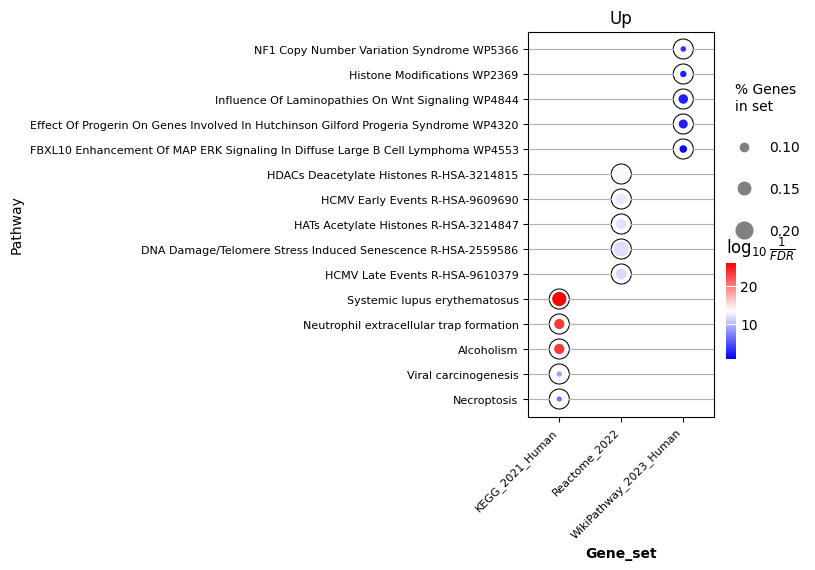

In [108]:
from gseapy import barplot, dotplot

# categorical scatterplot
ax = dotplot(enr.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(3,5),
              title = "KEGG",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
              cmap='bwr'
             )
ax.set_xlabel('Gene_set', fontsize=10)  # Set x-label with specific font size
ax.set_ylabel('Pathway', fontsize=10)  # Set y-label with specific font size
ax.tick_params(axis='x', labelsize=8)  # Set x-tick label size
ax.tick_params(axis='y', labelsize=8)  # Set y-tick label size
ax.set_title("Up", fontsize=12)  # Change '14' to your desired font size


# If you want to save the figure, you can retrieve the figure from the Axes object
fig = ax.get_figure()
fig.savefig("GeneSet_pathways.png", bbox_inches='tight') 

# Show the plot (optional)
import matplotlib.pyplot as plt
plt.show()


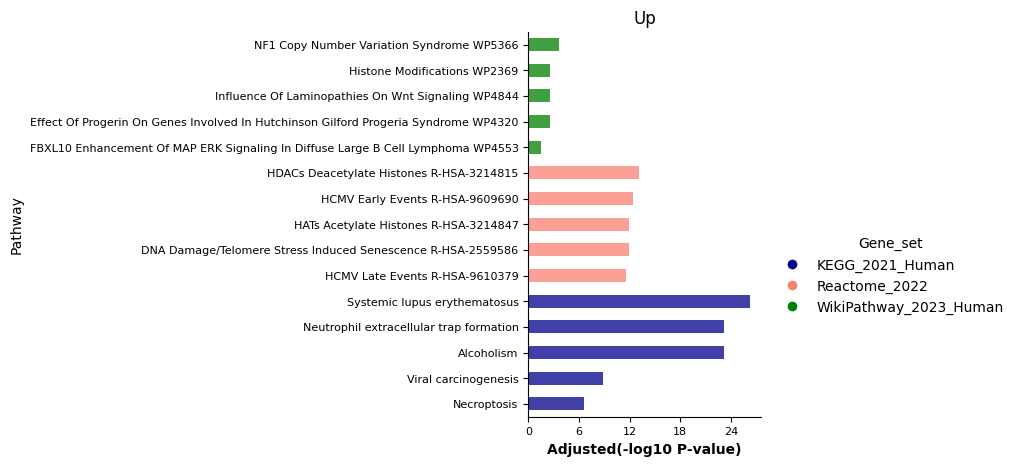

In [109]:

# categorical scatterplot
ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(3,5),
              #color=['darkred', 'darkblue'] # set colors for group
              color = {'Reactome_2022': 'salmon', 'KEGG_2021_Human':'darkblue','WikiPathway_2023_Human':'green' }
             )
ax.set_xlabel('Adjusted(-log10 P-value)', fontsize=10)  # Set x-label with specific font size
ax.set_ylabel('Pathway', fontsize=10)  # Set y-label with specific font size
ax.tick_params(axis='x', labelsize=8)  # Set x-tick label size
ax.tick_params(axis='y', labelsize=8)  # Set y-tick label size
ax.set_title("Up", fontsize=12)  # Change '14' to your desired font size

# If you want to save the figure, you can retrieve the figure from the Axes object
fig = ax.get_figure()
fig.savefig("GeneSet_pathways_barplot.pdf", bbox_inches='tight') 

# Show the plot (optional)
import matplotlib.pyplot as plt
plt.show()


In [110]:

import networkx as nx

In [111]:

nodes, edges = gp.enrichment_map(enr.results)

nodes.head()


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,p_inv,Hits_ratio
node_idx,,,,,,,,,,,,
0,Reactome_2022,HCMV Late Events R-HSA-9610379,12/91,3.184785e-14,2.582954e-12,0,0,33.827336,1051.279402,H2AC11;H2BC12;H2BC9;H2AC12;H2BC13;H2BC15;H2AC6...,11.587883,0.131868
1,Reactome_2022,HCMV Infection R-HSA-9609646,13/121,3.922056e-14,2.582954e-12,0,0,27.071023,835.670972,H2BC9;H2AC6;EGFR;H2BC18;H2AC11;H2BC12;H2AC12;H...,11.587883,0.107438
2,Reactome_2022,RNA Polymerase I Promoter Opening R-HSA-73728,9/32,3.778575e-14,2.582954e-12,0,0,84.538752,2612.826063,H2BC9;H2BC12;H2BC13;H2BC15;H2AC6;H2BC21;H2AC20...,11.587883,0.281250
3,Reactome_2022,DNA Damage/Telomere Stress Induced Senescence ...,11/61,1.055521e-14,1.216488e-12,0,0,48.519778,1561.471096,H2BC12;H2BC9;H1-5;H2BC13;H1-4;H2BC15;H2AC6;H2B...,11.914892,0.180328
4,Reactome_2022,HATs Acetylate Histones R-HSA-3214847,13/106,6.764069e-15,1.039412e-12,0,0,31.461144,1026.487510,H2BC9;DR1;H2AC6;H2BC18;H2AC11;H2BC12;H2AC12;H2...,11.983212,0.122642


In [112]:

# build graph
G = nx.from_pandas_edgelist(edges,
                            source='src_idx',
                            target='targ_idx',
                            edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])

In [113]:

nodes.Hits_ratio

node_idx
0    0.131868
1    0.107438
2    0.281250
3    0.180328
4    0.122642
5    0.135417
6    0.200000
7    0.123656
8    0.121693
9    0.170370
Name: Hits_ratio, dtype: float64

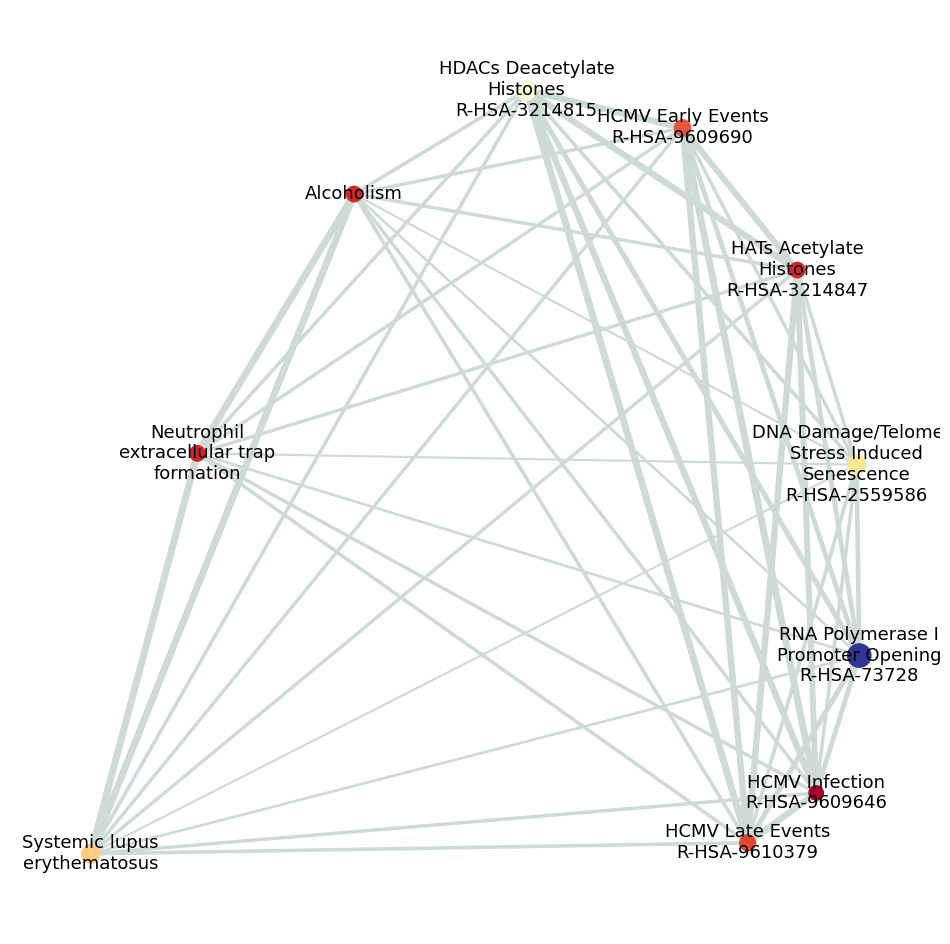

In [114]:
import matplotlib.pyplot as plt
import networkx as nx
import textwrap
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust figure size

# Initialize node coordinates
pos = nx.layout.spiral_layout(G)

# Optionally adjust positions to move labels away from the edges
for node, (x, y) in pos.items():
    pos[node] = (x*1.1, y*1.1)  # Adjust factor as necessary to move labels inward

# Draw nodes
nx.draw_networkx_nodes(G, pos=pos, cmap=plt.cm.RdYlBu, node_color=list(nodes.Hits_ratio), node_size=list(nodes.Hits_ratio * 1000))

# Wrap long labels and draw them with a smaller font size
wrapped_labels = {node: '\n'.join(textwrap.wrap(label, width=20)) for node, label in nodes.Term.to_dict().items()}  # Wrap labels to avoid them going into margins
nx.draw_networkx_labels(G, pos=pos, labels=wrapped_labels, font_size=13)  # Smaller font size

# Draw edges
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G, pos=pos, width=list(map(lambda x: x * 5, edge_weight)), edge_color='#CDDBD4')
for spine in ax.spines.values():
    spine.set_visible(False)

    
# If you want to save the figure, you can retrieve the figure from the Axes object
fig.savefig("Network.png") 

# Show the plot (optional)
import matplotlib.pyplot as plt
plt.show()    
plt.show()

     
